In [1]:
# On importe les librairies dont on aura besoin pour la Question1
import os
from utils import *
from tsne import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

from sklearn import preprocessing

In [2]:
#------------Task_0: Chargement et normalisation des donnees----------------------------------------#

#chargement des donnee
hdr_data = load_HDR_data()
country_names = hdr_data["country_names"]
data = hdr_data["X"]

data_scaled = preprocessing.scale(data)
data_2D = tsne(data_scaled, perplexity = 20)
data_scaled

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  138 ...
Mean value of sigma:  3.213978289678509
Iteration  10 : error is  12.472722972981625
Iteration  20 : error is  11.35342359316881
Iteration  30 : error is  12.827932032747178
Iteration  40 : error is  12.750788818973657
Iteration  50 : error is  13.302268101251896
Iteration  60 : error is  13.144270506083066
Iteration  70 : error is  12.852264959944275
Iteration  80 : error is  12.2333370146728
Iteration  90 : error is  12.702238749081285
Iteration  100 : error is  11.622995262204705
Iteration  110 : error is  1.5927830159868221
Iteration  120 : error is  1.2737724062623808
Iteration  130 : error is  1.04608995286731
Iteration  140 : error is  0.8184717325947372
Iteration  150 : error is  0.6206906093396419
Iteration  160 : error is  0.5316630739928032
Iteration  170 : error is  0.4974910750865496
Iteration  180 : error is  0.48184140330317
Iteration  190 : error is  0.469603

array([[-1.03635537e+00, -6.65934742e-01, -3.70435382e-01, ...,
         2.44426139e+00, -7.97354834e-01, -7.79256302e-01],
       [-6.14476193e-01, -3.63635418e-01, -3.46825516e-01, ...,
         4.24004528e-01, -7.97354834e-01, -7.79256302e-01],
       [-3.61348687e-01, -1.62102536e-01, -3.65713409e-01, ...,
         1.39672080e+00, -7.97354834e-01, -7.79256302e-01],
       ...,
       [ 7.35537174e-01,  1.75245985e+00, -3.27937623e-01, ...,
        -3.99063085e-01,  4.62026716e-01,  1.94952978e-01],
       [ 3.13657997e-01,  1.14786120e+00,  7.10691196e-02, ...,
        -3.99063085e-01,  1.02293026e-03,  7.40690583e-01],
       [ 1.24179219e+00,  2.05475917e+00, -3.13771703e-01, ...,
        -3.99063085e-01,  3.92554311e-01,  1.16023985e-01]])

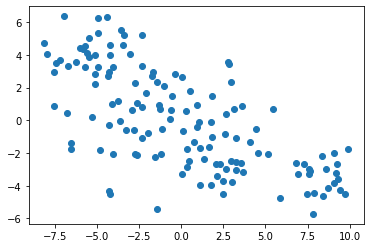

In [3]:
plt.scatter(data_2D[:,0],data_2D[:,1], label='True Position')


In [4]:
#-----------task_1: regroupement des instances en ++ groupes: choix du meilleur clustering-----------------#

#----task_1.1 :essayer plusieurs nombre de clusters et 
#choisir le clustering qui faitle plus de sens pour vous-------------------------------#

#kmeans = KMeans(n_clusters=2, init='k-means++')
#kmeans.fit(data_scaled)

kmeans = KMeans(n_clusters=4)
kmeans.fit(data_2D)

print("Valeur des centre des cluster : les centroïdes \n")
print(kmeans.cluster_centers_) # valeurs des coordonnées centroïdes.

print("\n _____pays associe a chaque centroïdes_____\n")
centroides, index_centroides = find_closest_instances_to_kmeans(data_2D, kmeans)

for i in range(0, len(index_centroides) ):
    na = index_centroides[i]
    print ("*",country_names[na], " : seras le centroïdes associer au Cluter en X \n" )

Valeur des centre des cluster : les centroïdes 

[[ 8.26356811 -3.50648214]
 [-5.31218213  3.96141311]
 [-2.5884322  -0.14809499]
 [ 2.27045154 -1.27334857]]

 _____pays associe a chaque centroïdes_____

* Austria  : seras le centroïdes associer au Cluter en X 

* Niger  : seras le centroïdes associer au Cluter en X 

* Morocco  : seras le centroïdes associer au Cluter en X 

* Cyprus  : seras le centroïdes associer au Cluter en X 



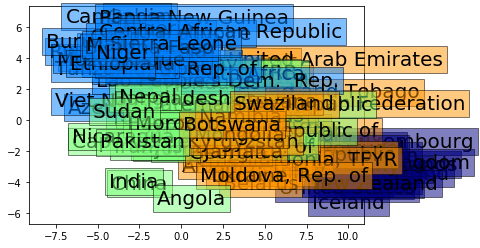

In [5]:
#task_1.2 : affichage du graphe. vous devez réduire la dimensionnalitédes données 
#afin de les visualiser sur l'écran de votre ordinateur.
show_annotated_clustering(data_2D, kmeans.labels_, country_names)

In [6]:
#-------task_2 :Votre deuxième tâche consiste à regrouper les données HDR avec l'algorithme k-means pourk = 2 ... 10 grappes. 
#Choisissez un cluster  (pas assez de grappes, assez de grappes, trop de grappes).puis commenter


SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


NameError: name 'X_scaled' is not defined